<a href="https://colab.research.google.com/github/kirflex/NLP_W6/blob/main/nn_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

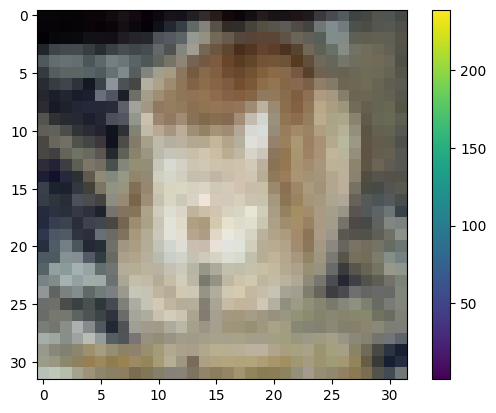

In [ ]:
plt.figure()
plt.imshow(x_train[33])
plt.colorbar()
plt.grid(False)

In [ ]:
x_train = x_train/ 255
x_test = x_test/ 255

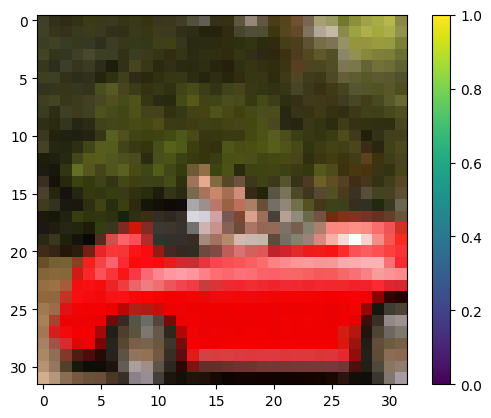

In [ ]:
plt.figure()
plt.imshow(x_train[99])
plt.colorbar()
plt.grid(False)

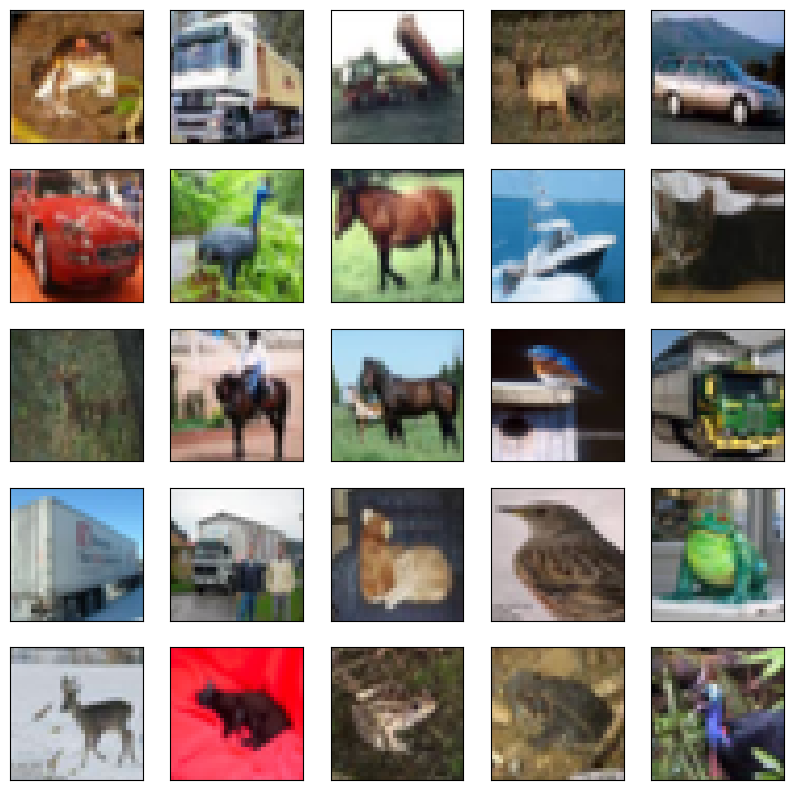

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(64, 3, activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(128, 3, activation="relu"),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(20, activation="softmax")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 2048)            

In [ ]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 89s 56ms/step - loss: 2.0717 - accuracy: 0.2416
Epoch 2/25
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6947 - accuracy: 0.3892
Epoch 3/25
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5192 - accuracy: 0.4550
Epoch 4/25
1563/1563 [==============================] - 85s 54ms/step - loss: 1.3934 - accuracy: 0.5017
Epoch 5/25
1563/1563 [==============================] - 90s 58ms/step - loss: 1.2926 - accuracy: 0.5417
Epoch 6/25
1563/1563 [==============================] - 85s 54ms/step - loss: 1.2109 - accuracy: 0.5726
Epoch 7/25
1563/1563 [==============================] - 87s 55ms/step - loss: 1.1367 - accuracy: 0.5987
Epoch 8/25
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0706 - accuracy: 0.6247
Epoch 9/25
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0149 - accuracy: 0.6469
Epoch 10/25
1563/1563 [==============================] - 86s 55m

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.9980 - accuracy: 0.7023
Test loss: 0.9979968070983887
Test accuracy: 0.7023000121116638


In [ ]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 26s 17ms/step


In [ ]:
predictions[0]

array([2.5927754e-06, 8.9451009e-07, 4.7870893e-03, 8.0200136e-03,
       1.5974330e-03, 1.9206434e-02, 9.6577954e-01, 6.0390495e-04,
       1.0642114e-07, 6.7959354e-09, 2.6062182e-07, 8.1356557e-09,
       9.3518207e-09, 2.3575947e-08, 3.0828596e-07, 2.0625997e-08,
       2.6527012e-09, 1.1008696e-08, 9.9308295e-07, 2.2106751e-07],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

6

In [ ]:
y_train[1000]

array([9], dtype=uint8)

Text(0.5, 0, '[9]')

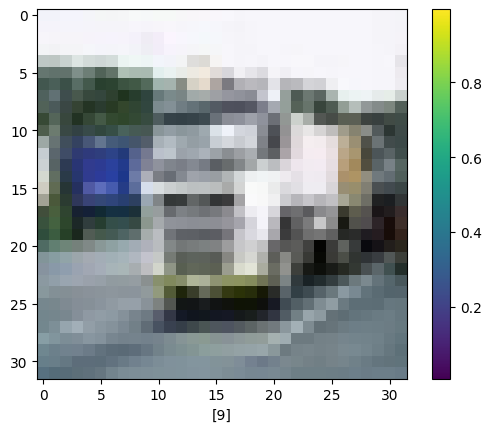

In [ ]:
plt.figure()
plt.imshow(x_train[1000])
plt.colorbar()
plt.grid(False)
plt.xlabel(y_train[1000])